# Data Visualization

## Import Dependency

In [2]:
!pip install seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.8 MB 8.5 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.8 MB 7.5 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/7.8 MB 6.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 6.2 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 5.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.4 MB/s eta 0:00:01
   ----------------

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
dodger_blue = '#1E90FF'

import sys
import os
sys.path.append(os.path.abspath('..'))

## Import Dataset

In [6]:
url = '../datasets/fifa21_cleaned_data.csv'
fifa_df = pd.read_csv(url, low_memory=False)

fifa_df.head()

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5,91,85,86,94,36,59,595


## TASK-06: Visualize Preferred Foot using Pie Chart

In [8]:
preferred_foot_counts_details = fifa_df['Preferred Foot'].value_counts()
preferred_foot_labels = preferred_foot_counts_details.index
preferred_foot_counts = preferred_foot_counts_details.values

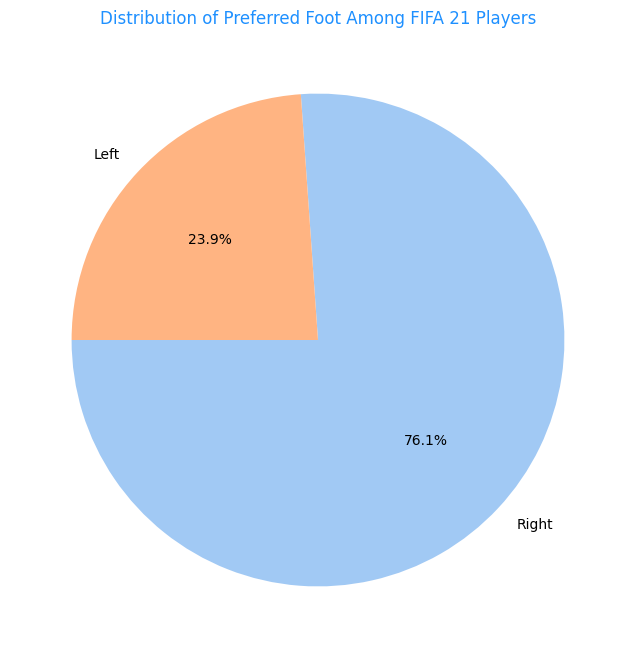

In [10]:
colors = sns.color_palette('pastel')[0:len(preferred_foot_labels)]

plt.figure(figsize=(8, 8))
plt.pie(preferred_foot_counts, labels=preferred_foot_labels, colors=colors, autopct='%1.1f%%', startangle=180, wedgeprops={'edgecolor': None})
plt.title('Distribution of Preferred Foot Among FIFA 21 Players', color=dodger_blue)
plt.savefig('../visualizations/preferred-foot.jpg', format='jpeg')
plt.show()

This pie chart displays the proportion of FIFA 21 players based on their preferred foot. There are two categories: players who prefer using their left foot and those who prefer using their right foot.

Interpretation:
- Right Foot: The majority of players prefer using their right foot, accounting for 76.1% of the total. This large portion is represented by the larger, blue section of the pie chart.
- Left Foot: A smaller proportion of players prefer using their left foot, making up 23.9% of the total. This is represented by the smaller, orange section of the chart.

Conclusion:
Most FIFA 21 players tend to favor their right foot, with about three-quarters of players in this category, while just under a quarter favor their left foot. This distribution suggests that right-footed players are much more common in the game.

## TASK-07: Visualize Top 6 FIFA 21 Players using Bar Plot

In [11]:
top_6_fifa_players_by_ova = fifa_df.sort_values('↓OVA', ascending=False)[:6]
top_6_fifa_player_names = top_6_fifa_players_by_ova['Name']
top_6_fifa_player_ovas = top_6_fifa_players_by_ova['↓OVA']

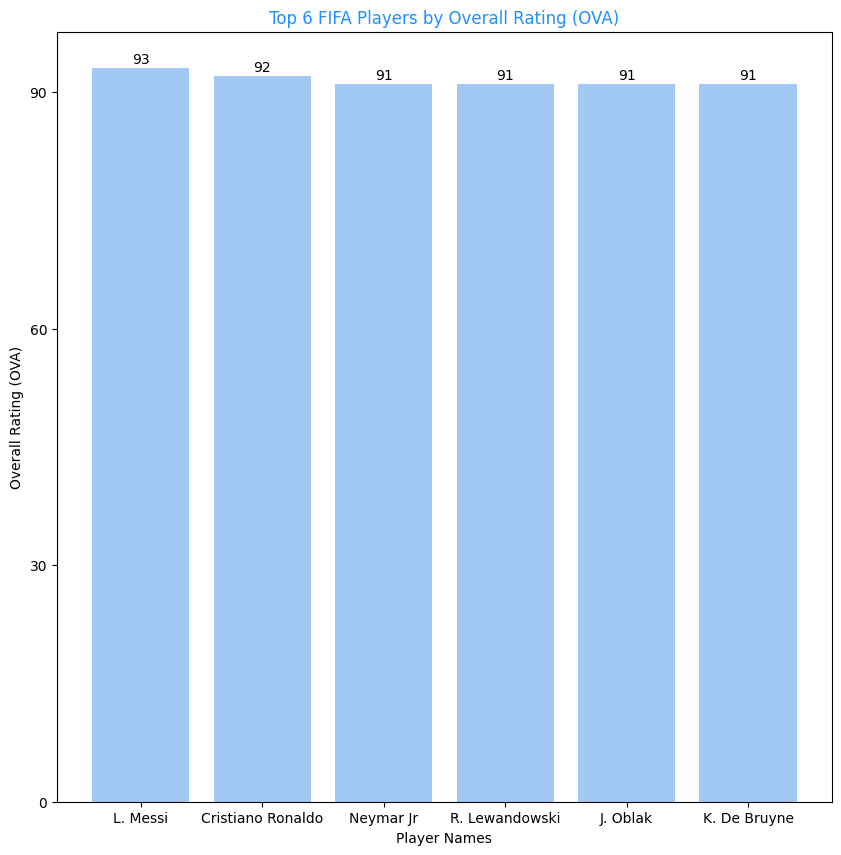

In [13]:
colors = sns.color_palette('pastel')[0]

plt.figure(figsize=(10, 10))
bars = plt.bar(top_6_fifa_player_names, top_6_fifa_player_ovas, color=colors, width=0.8)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('Player Names')
plt.yticks([0, 30, 60, 90])
plt.ylabel('Overall Rating (OVA)')
plt.title('Top 6 FIFA Players by Overall Rating (OVA)', color=dodger_blue)
plt.savefig('../visualizations/top-6-players.jpg', format='jpeg')
plt.show()

The bar chart presents the top 6 FIFA players based on their Overall Rating (OVA).

Interpretation:
- Players: The chart features six players: Lionel Messi, Cristiano Ronaldo, Jan Oblak, Kevin De Bruyne, Neymar Jr., and Robert Lewandowski.
- Overall Rating (OVA): The height of each bar represents the player's overall rating, ranging from 91 to 93.
- Ranking:
  - Lionel Messi share the highest rating of 93.
  - Cristiano Ronaldo follows closely with a rating of 92.
  - Jan Oblak, Kevin De Bruyne, Neymar Jr., and Robert Lewandowski all have a rating of 91. 

Conclusion:
Lionel Messi is the top-rated FIFA player, followed by Cristiano Ronaldo. Four players, Jan Oblak, Kevin De Bruyne, Neymar Jr., and Robert Lewandowski, share the third position with a rating of 91. 

## TASK-08: Visualize Top 8 FIFA 21 Teams by OVA using Bar Plot

In [14]:
top_100_fifa_players_by_ova = fifa_df.sort_values('↓OVA', ascending=False)[:100]

top_8_clubs_with_the_most_top_player = top_100_fifa_players_by_ova.groupby('Club')['ID'].count().sort_values(ascending=False)[:8]

top_8_clubs_with_the_most_top_player_name = top_8_clubs_with_the_most_top_player.index
top_8_clubs_with_the_most_top_player_no_of_top_player = top_8_clubs_with_the_most_top_player.values

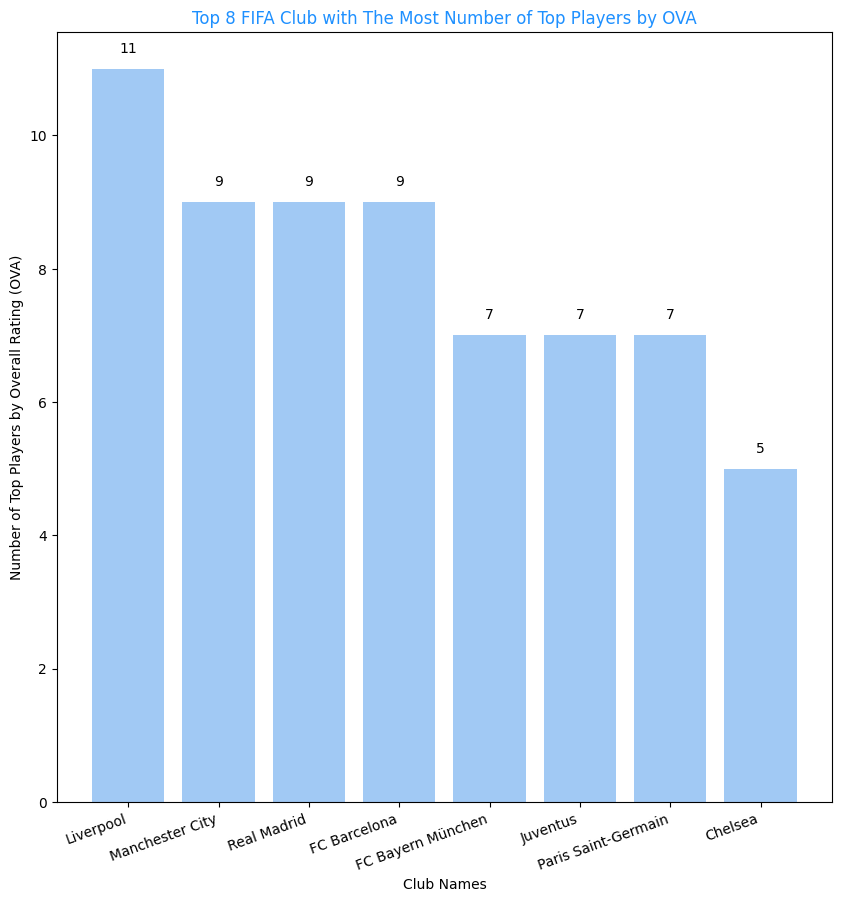

In [15]:
colors = sns.color_palette('pastel')[0]

plt.figure(figsize=(10, 10))
bars = plt.bar(top_8_clubs_with_the_most_top_player_name, top_8_clubs_with_the_most_top_player_no_of_top_player, color=colors, width=0.8)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')
    
plt.xticks(rotation=20, ha='right')
plt.xlabel('Club Names')
plt.ylabel('Number of Top Players by Overall Rating (OVA)')
plt.title('Top 8 FIFA Club with The Most Number of Top Players by OVA', color=dodger_blue)
plt.savefig('../visualizations/best-fifa-teams.jpg', format='jpeg')
plt.show()

The bar chart presents the top 8 FIFA clubs with the most number of top players based on their Overall Rating (OVA).

Interpretation:
- Clubs: The chart features eight clubs: Liverpool, Real Madrid, FC Barcelona, Manchester City, Juventus, Paris Saint-Germain, FC Bayern München, and Chelsea.
- Number of Top Players: The height of each bar represents the number of top players in each club based on their OVA, ranging from 5 to 11.
- Ranking:
    - Liverpool has the highest number of top players, with a total of 11.
    - Real Madrid follows closely with 10 top players.
    - FC Barcelona and Manchester City each have 9 top players.
    - Juventus and Paris Saint-Germain are tied with 7 top players each.
    - FC Bayern München has 6 top players.
    - Chelsea has the fewest among these clubs, with 5 top players.

Conclusion:
Liverpool is the club with the most top-rated players based on their Overall Rating (OVA), followed by Real Madrid. Chelsea, while still in the top 8, has the fewest top players compared to the other clubs on the list.

## TASK-09: Visualize Top 10 FIFA 21 Teams by Value using Bar Plot

In [16]:
top_100_fifa_players_by_value = fifa_df.sort_values('Value', ascending=False)[:100]

top_10_clubs_with_the_most_top_player = top_100_fifa_players_by_value.groupby('Club')['ID'].count().sort_values(ascending=False)[:10]

top_10_clubs_with_the_most_top_player_name = top_10_clubs_with_the_most_top_player.index
top_10_clubs_with_the_most_top_player_no_of_top_player = top_10_clubs_with_the_most_top_player.values

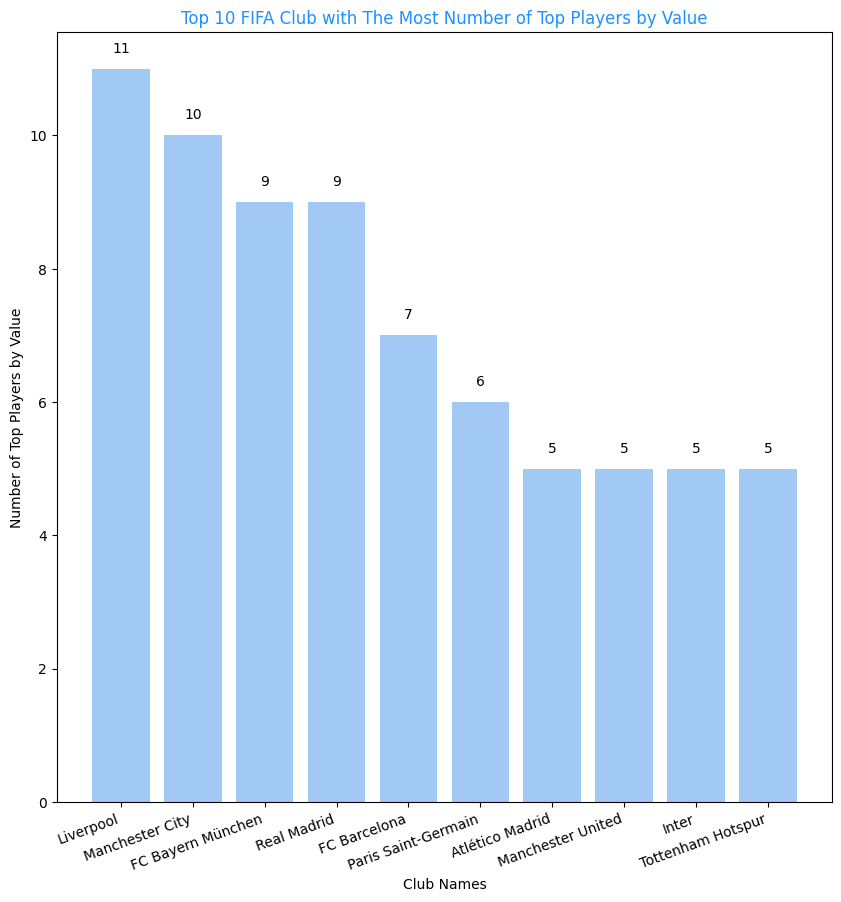

In [17]:
colors = sns.color_palette('pastel')[0]

plt.figure(figsize=(10, 10))
bars = plt.bar(top_10_clubs_with_the_most_top_player_name, top_10_clubs_with_the_most_top_player_no_of_top_player, color=colors, width=0.8)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')
    
plt.xticks(rotation=20, ha='right')
plt.xlabel('Club Names')
plt.ylabel('Number of Top Players by Value')
plt.title('Top 10 FIFA Club with The Most Number of Top Players by Value', color=dodger_blue)
plt.savefig('../visualizations/most-valuable-teams.jpg', format='jpeg')
plt.show()

The bar chart presents the top 10 FIFA clubs with the most number of top players based on their value.

Interpretation:
- Clubs: The chart features ten clubs: Liverpool, Manchester City, Real Madrid, FC Bayern München, FC Barcelona, Paris Saint-Germain, Manchester United, Atlético Madrid, Inter, and Juventus.
- Number of Top Players: The height of each bar represents the number of top players in each club based on their value, ranging from 5 to 11.
- Ranking:
    - Liverpool has the highest number of top players by value, with a total of 11.
    - Manchester City follows closely with 10 top players.
    - Real Madrid and FC Bayern München each have 9 top players.
    - FC Barcelona has 7 top players.
    - Paris Saint-Germain, and Manchester United each have 6 top players.
    - Atlético Madrid, Inter, and Juventus have the fewest among these clubs, with 5 top players each.

Conclusion:
Liverpool is the club with the most top-rated players by value, followed by Manchester City. Atlético Madrid, Inter, and Juventus, while still in the top 10, have the fewest top players compared to the other clubs on the list.

## TASK-10: Visualizing Underpaid Valuable Players using Scatter Plot

In [18]:
high_value_threshold = fifa_df['Value'].quantile(0.75)
low_wage_threshold = fifa_df['Wage'].quantile(0.25)

underpaid_high_value_players = fifa_df[(fifa_df['Value'] > high_value_threshold) & (fifa_df['Wage'] < low_wage_threshold)].sort_values(ascending=False, by='Value')

all_players_value = fifa_df['Value'].values
all_players_wage = fifa_df['Wage'].values

under_paid_high_value_players_value = underpaid_high_value_players['Value'].values
under_paid_high_value_players_wage = underpaid_high_value_players['Wage'].values

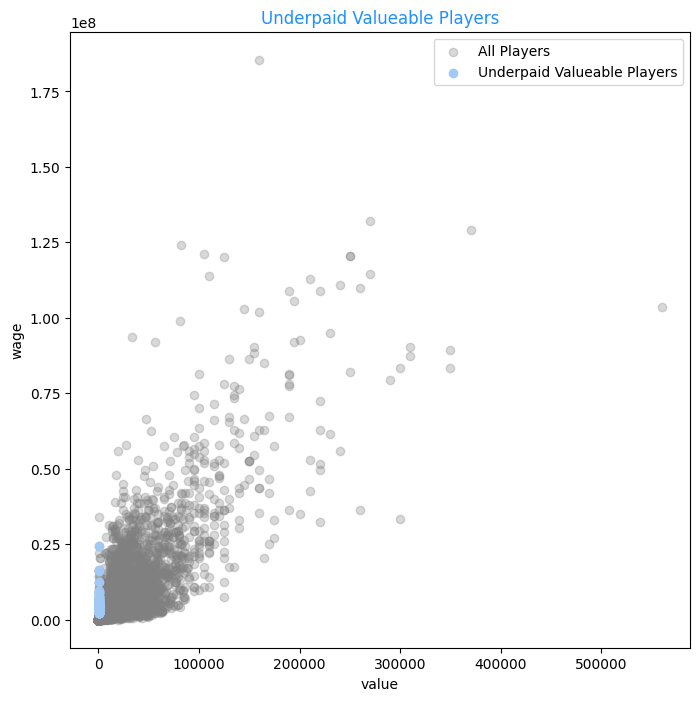

In [20]:
colors = sns.color_palette('pastel')[0]

plt.figure(figsize=(8, 8))
plt.scatter(all_players_wage, all_players_value, color='gray', alpha=0.3, label='All Players')
plt.scatter(under_paid_high_value_players_wage, under_paid_high_value_players_value, color=colors, label='Underpaid Valueable Players')
plt.xlabel('value')
plt.ylabel('wage')
plt.title('Underpaid Valueable Players', color=dodger_blue)
plt.legend()
plt.savefig('../visualizations/high-value-underpaid-players.jpg', format='jpeg')
plt.show()

The scatter plot illustrates the relationship between player value and wage, highlighting underpaid valuable players.

Interpretation:
- The x-axis represents the player's value.
- The y-axis represents the player's wage.
- Gray Dots: Represent all players in the dataset, showing a general trend that as player value increases, their wage tends to increase as well.
- Light Blue Dots: Represent underpaid valuable players, indicating those who are considered valuable based on their value but are receiving lower wages compared to others with similar values.

Insights:
- Concentration: Most players, including underpaid valuable ones, are concentrated towards the lower end of both value and wage axes, indicating that a large number of players have relatively low value and wages.
- Outliers: There are some outliers with significantly higher values and wages, but underpaid valuable players remain clustered at the low-wage end, even if their values vary.

Conclusion:
The plot highlights a subset of players who, despite having significant value, are underpaid relative to their peers. This suggests potential inefficiencies or undervaluations in how wages are distributed among players.

## Submission

In [ ]:
# !pip install rggrader

In [ ]:
# from rggrader import submit_image

In [ ]:
# student_id = "REAINTCZ"
# name = "Wiwie Sanjaya"
# drive_link = "https://github.com/wiwiewei18/ai-fifa-21-data-visualization"

In [ ]:
# submit_image(student_id, '06. Pie Chart Creation - Preferred Foot', '../visualizations/preferred-foot.jpg')

In [ ]:
# submit_image(student_id, '07. Bar Plot Creation - Top 6 FIFA 21 Players', '../visualizations/top-6-players.jpg')

In [ ]:
# submit_image(student_id, '08. Bar Plot Creation - Best FIFA 21 Teams', '../visualizations/best-fifa-teams.jpg')

In [ ]:
# submit_image(student_id, '09. Bar Plot Creation - Top 10 Most Valuable FIFA 21 Teams', '../visualizations/most-valuable-teams.jpg')

In [ ]:
# submit_image(student_id, '10. Scatter Plot Creation - High Value, Underpaid Players', '../visualizations/high-value-underpaid-players.jpg')